In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('sb_30-05_slim_slim-1.csv')

In [3]:
sb_labs = df['shot_statsbomb_xg'].values
y = df['goal'].values

print(f"sb_labs shape: {sb_labs.shape}, y shape: {y.shape}")

sb_labs shape: (77617,), y shape: (77617,)


In [4]:
df.drop(['shot_body_part', 'shot_technique', 'shot_outcome', 'goal', 'shot_statsbomb_xg'], axis = 1, inplace = True)

In [5]:
df_1h = pd.get_dummies(df, columns = ['play_pattern', 'shot_aerial_won', 'shot_first_time', 
                                      'shot_one_on_one', 'shot_type', 'under_pressure', 'prev_type'])

In [6]:
useful_cols = [0,4,1,3,2,15,30,18,29,17,20,9,28,5,7,27,25,24,26,8,21,13,12,6,23,10,16,11,
              -1,14,19]

use_cols = [col + 1 for col in useful_cols]
#use_cols

In [7]:
df_slim = df_1h.copy()
df_slim = df_slim.iloc[:, use_cols]

In [8]:
df_1h.columns

Index(['x', 'y', 'goalkeeper_dx', 'goalkeeper_dy', 'opposition_1_dx',
       'opposition_1_dy', 'opposition_2_dx', 'opposition_2_dy',
       'opposition_3_dx', 'opposition_3_dy', 'opposition_4_dx',
       'opposition_4_dy', 'teammate_1_dx', 'teammate_1_dy', 'teammate_2_dx',
       'teammate_2_dy', 'goalkeeper_x', 'goalkeeper_y', 'opposition_1_x',
       'opposition_1_y', 'opposition_2_x', 'opposition_2_y', 'opposition_3_x',
       'opposition_3_y', 'opposition_4_x', 'opposition_4_y', 'teammate_1_x',
       'teammate_1_y', 'teammate_2_x', 'teammate_2_y', 'prev_x', 'prev_y',
       'play_pattern_From Corner', 'play_pattern_From Counter',
       'play_pattern_From Free Kick', 'play_pattern_From Goal Kick',
       'play_pattern_From Keeper', 'play_pattern_From Kick Off',
       'play_pattern_From Throw In', 'play_pattern_Other',
       'play_pattern_Regular Play', 'shot_aerial_won_False',
       'shot_aerial_won_True', 'shot_first_time_False', 'shot_first_time_True',
       'shot_one_on_on

In [9]:
df_1h.columns[31]

'prev_y'

In [10]:
print(0%2)

0


In [11]:
import numpy as np
#for i, column in enumerate(df_1h.columns[:31]):
 #   if i % 2 == 0:
  #      df_1h[f"{column[:-1]}xy"] = list(zip(df_1h[column], df_1h[df_1h.columns[i+1]]))
for i, column in enumerate(df_1h.columns[:31]):
    if i % 2 == 0:
        df_1h[f"{column[:-1]}xy"] = [list(x) for x in zip(df_1h[column], df_1h[df_1h.columns[i+1]])]


In [12]:
#df_check = df_1h.copy()
#df_check = df_1h[['x', 'y', 'xy', 'goalkeeper_x', 'goalkeeper_y', 'goalkeeper_xy']]
#df_check.head(30)
print(list(df_1h.columns))

['x', 'y', 'goalkeeper_dx', 'goalkeeper_dy', 'opposition_1_dx', 'opposition_1_dy', 'opposition_2_dx', 'opposition_2_dy', 'opposition_3_dx', 'opposition_3_dy', 'opposition_4_dx', 'opposition_4_dy', 'teammate_1_dx', 'teammate_1_dy', 'teammate_2_dx', 'teammate_2_dy', 'goalkeeper_x', 'goalkeeper_y', 'opposition_1_x', 'opposition_1_y', 'opposition_2_x', 'opposition_2_y', 'opposition_3_x', 'opposition_3_y', 'opposition_4_x', 'opposition_4_y', 'teammate_1_x', 'teammate_1_y', 'teammate_2_x', 'teammate_2_y', 'prev_x', 'prev_y', 'play_pattern_From Corner', 'play_pattern_From Counter', 'play_pattern_From Free Kick', 'play_pattern_From Goal Kick', 'play_pattern_From Keeper', 'play_pattern_From Kick Off', 'play_pattern_From Throw In', 'play_pattern_Other', 'play_pattern_Regular Play', 'shot_aerial_won_False', 'shot_aerial_won_True', 'shot_first_time_False', 'shot_first_time_True', 'shot_one_on_one_False', 'shot_one_on_one_True', 'shot_type_Corner', 'shot_type_Free Kick', 'shot_type_Open Play', 'und

In [13]:
df_1h.drop(['x', 'y', 'goalkeeper_dx', 'goalkeeper_dy', 'opposition_1_dx', 'opposition_1_dy', 'opposition_2_dx', 'opposition_2_dy', 'opposition_3_dx', 'opposition_3_dy', 'opposition_4_dx', 'opposition_4_dy', 'teammate_1_dx', 'teammate_1_dy', 'teammate_2_dx', 'teammate_2_dy', 'goalkeeper_x', 'goalkeeper_y', 'opposition_1_x', 'opposition_1_y', 'opposition_2_x', 'opposition_2_y', 'opposition_3_x', 'opposition_3_y', 'opposition_4_x', 'opposition_4_y', 'teammate_1_x', 'teammate_1_y', 'teammate_2_x', 'teammate_2_y', 'prev_x', 'prev_y']
           , axis =1, inplace = True)
df_1h.head()

,play_pattern_From Corner,play_pattern_From Counter,play_pattern_From Free Kick,play_pattern_From Goal Kick,play_pattern_From Keeper,play_pattern_From Kick Off,play_pattern_From Throw In,play_pattern_Other,play_pattern_Regular Play,shot_aerial_won_False,...,teammate_1_dxy,teammate_2_dxy,goalkeeper_xy,opposition_1_xy,opposition_2_xy,opposition_3_xy,opposition_4_xy,teammate_1_xy,teammate_2_xy,prev_xy
0,0,0,1,0,0,0,0,0,0,1,...,"[3.799999999999997, -5.0]","[6.699999999999989, 1.7999999999999972]","[118.4, 38.5]","[101.9, 35.1]","[105.4, 31.5]","[107.2, 38.1]","[105.5, 28.3]","[104.2, 30.1]","[107.1, 36.9]","[101.7, 35.6]"
1,0,0,0,0,0,0,0,0,1,1,...,"[-1.0, 6.299999999999997]","[-10.299999999999995, 7.5]","[118.3, 36.4]","[114.3, 34.6]","[113.0, 37.1]","[114.6, 39.1]","[109.3, 48.1]","[113.6, 39.8]","[104.3, 41.0]","[111.0, 69.2]"
2,0,0,1,0,0,0,0,0,0,1,...,"[-6.799999999999997, 2.700000000000003]","[9.700000000000005, -8.099999999999994]","[118.2, 42.9]","[108.9, 59.7]","[109.1, 50.8]","[108.9, 46.2]","[113.3, 46.9]","[99.4, 58.5]","[115.9, 47.7]","[105.8, 56.5]"
3,1,0,0,0,0,0,0,0,0,1,...,"[-2.0, -1.1999999999999955]","[1.5999999999999943, -6.899999999999999]","[118.9, 41.9]","[114.1, 46.4]","[113.2, 46.6]","[113.0, 45.1]","[113.4, 41.2]","[111.9, 46.2]","[115.5, 40.5]","[120.0, 0.1]"
4,0,0,0,0,0,0,0,0,1,1,...,"[-1.7000000000000028, -5.5]","[6.899999999999992, 8.299999999999997]","[116.9, 40.1]","[91.9, 43.8]","[92.3, 40.6]","[91.1, 51.5]","[102.0, 41.4]","[87.5, 37.0]","[96.1, 50.8]","[87.6, 46.0]"


In [14]:
df_1h.columns

Index(['play_pattern_From Corner', 'play_pattern_From Counter',
       'play_pattern_From Free Kick', 'play_pattern_From Goal Kick',
       'play_pattern_From Keeper', 'play_pattern_From Kick Off',
       'play_pattern_From Throw In', 'play_pattern_Other',
       'play_pattern_Regular Play', 'shot_aerial_won_False',
       'shot_aerial_won_True', 'shot_first_time_False', 'shot_first_time_True',
       'shot_one_on_one_False', 'shot_one_on_one_True', 'shot_type_Corner',
       'shot_type_Free Kick', 'shot_type_Open Play', 'under_pressure_False',
       'under_pressure_True', 'prev_type_50/50', 'prev_type_Ball Recovery',
       'prev_type_Block', 'prev_type_Carry', 'prev_type_Clearance',
       'prev_type_Dispossessed', 'prev_type_Dribble', 'prev_type_Duel',
       'prev_type_Foul Won', 'prev_type_Interception', 'prev_type_Miscontrol',
       'prev_type_Pass', 'prev_type_Pressure', 'prev_type_Shot', 'xy',
       'goalkeeper_dxy', 'opposition_1_dxy', 'opposition_2_dxy',
       'opposition

In [15]:
import numpy as np
#print(df_1h.columns[:34])
#print(df_1h.columns[34:])
print(len(df_1h.columns))
coord_cols = np.arange(34,50,1)
cat_cols = np.arange(0,34,1)

50


In [16]:
df_1h.columns[49]

'prev_xy'

In [17]:
from sklearn.preprocessing import StandardScaler

import numpy as np

coord_data = df_1h.iloc[:, coord_cols]
cat_data =  df_1h.iloc[:,cat_cols]

#def convert_to_tensor_format(data):
 #   max_len = max(len(row) for row in data)  # Find the maximum length of inner arrays
  #  padded_data = np.array([row + [(0.0, 0.0)] * (max_len - len(row)) for row in data], dtype=np.float32)
   # return padded_data
#converted_data = convert_to_tensor_format(coord_data)

#scaler = StandardScaler()
#coord_scaled = scaler.fit_transform(coord_data)
X = np.hstack((coord_data, cat_data))

#X = df_1h


In [18]:
coord_data

,xy,goalkeeper_dxy,opposition_1_dxy,opposition_2_dxy,opposition_3_dxy,opposition_4_dxy,teammate_1_dxy,teammate_2_dxy,goalkeeper_xy,opposition_1_xy,opposition_2_xy,opposition_3_xy,opposition_4_xy,teammate_1_xy,teammate_2_xy,prev_xy
0,"[100.4, 35.1]","[18.0, 3.3999999999999986]","[1.5, 0.0]","[5.0, -3.6000000000000014]","[6.799999999999997, 3.0]","[5.099999999999994, -6.800000000000001]","[3.799999999999997, -5.0]","[6.699999999999989, 1.7999999999999972]","[118.4, 38.5]","[101.9, 35.1]","[105.4, 31.5]","[107.2, 38.1]","[105.5, 28.3]","[104.2, 30.1]","[107.1, 36.9]","[101.7, 35.6]"
1,"[114.6, 33.5]","[3.700000000000003, 2.8999999999999986]","[-0.2999999999999971, 1.1000000000000014]","[-1.5999999999999943, 3.6000000000000014]","[0.0, 5.600000000000001]","[-5.299999999999997, 14.6]","[-1.0, 6.299999999999997]","[-10.299999999999995, 7.5]","[118.3, 36.4]","[114.3, 34.6]","[113.0, 37.1]","[114.6, 39.1]","[109.3, 48.1]","[113.6, 39.8]","[104.3, 41.0]","[111.0, 69.2]"
2,"[106.2, 55.8]","[12.0, -12.9]","[2.700000000000003, 3.9000000000000057]","[2.8999999999999915, -5.0]","[2.700000000000003, -9.599999999999994]","[7.099999999999994, -8.899999999999999]","[-6.799999999999997, 2.700000000000003]","[9.700000000000005, -8.099999999999994]","[118.2, 42.9]","[108.9, 59.7]","[109.1, 50.8]","[108.9, 46.2]","[113.3, 46.9]","[99.4, 58.5]","[115.9, 47.7]","[105.8, 56.5]"
3,"[113.9, 47.4]","[5.0, -5.5]","[0.1999999999999886, -1.0]","[-0.7000000000000028, -0.7999999999999972]","[-0.9000000000000057, -2.299999999999997]","[-0.5, -6.199999999999996]","[-2.0, -1.1999999999999955]","[1.5999999999999943, -6.899999999999999]","[118.9, 41.9]","[114.1, 46.4]","[113.2, 46.6]","[113.0, 45.1]","[113.4, 41.2]","[111.9, 46.2]","[115.5, 40.5]","[120.0, 0.1]"
4,"[89.2, 42.5]","[27.700000000000003, -2.3999999999999986]","[2.700000000000003, 1.2999999999999972]","[3.0999999999999943, -1.8999999999999984]","[1.8999999999999917, 9.0]","[12.799999999999995, -1.1000000000000014]","[-1.7000000000000028, -5.5]","[6.899999999999992, 8.299999999999997]","[116.9, 40.1]","[91.9, 43.8]","[92.3, 40.6]","[91.1, 51.5]","[102.0, 41.4]","[87.5, 37.0]","[96.1, 50.8]","[87.6, 46.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77612,"[100.3, 52.5]","[18.10000000000001, -9.299999999999995]","[0.2000000000000028, -1.2999999999999972]","[1.2999999999999972, -0.5]","[-6.799999999999997, 0.3999999999999986]","[2.700000000000003, -11.6]","[-3.0, -13.0]","[-16.39999999999999, -19.3]","[118.4, 43.2]","[100.5, 51.2]","[101.6, 52.0]","[93.5, 52.9]","[103.0, 40.9]","[97.3, 39.5]","[83.9, 33.2]","[70.8, 54.7]"
77613,"[96.3, 36.2]","[22.8, 2.3999999999999986]","[5.400000000000006, 0.5999999999999943]","[7.600000000000008, -3.0]","[12.299999999999995, 1.0999999999999943]","[12.0, 4.0]","[7.600000000000008, -4.300000000000004]","[11.5, 0.2999999999999971]","[119.1, 38.6]","[101.7, 36.8]","[103.9, 33.2]","[108.6, 37.3]","[108.3, 40.2]","[103.9, 31.9]","[107.8, 36.5]","[94.2, 39.1]"
77614,"[98.5, 24.3]","[20.599999999999994, 13.900000000000002]","[1.0999999999999943, -0.1999999999999993]","[-7.900000000000006, 0.3000000000000007]","[0.2999999999999971, 8.499999999999996]","[6.400000000000006, 6.300000000000001]","[-4.099999999999994, -8.700000000000001]","[-1.2000000000000028, 12.2]","[119.1, 38.2]","[99.6, 24.1]","[90.6, 24.6]","[98.8, 32.8]","[104.9, 30.6]","[94.4, 15.6]","[97.3, 36.5]","[101.2, 23.6]"
77615,"[102.9, 54.6]","[16.099999999999994, -12.1]","[1.1999999999999886, -2.3000000000000043]","[-0.2000000000000028, -14.300000000000004]","[-0.9000000000000057, -22.700000000000003]","[-15.400000000000006, -22.4]","[-16.200000000000003, -10.6]","[-4.700000000000003, -19.200000000000003]","[119.0, 42.5]","[104.1, 52.3]","[102.7, 40.3]","[102.0, 31.9]","[87.5, 32.2]","[86.7, 44.0]","[98.2, 35.4]","[55.1, 23.4]"


In [19]:
#coord_data = coord_data.to_numpy()
coord_data

,xy,goalkeeper_dxy,opposition_1_dxy,opposition_2_dxy,opposition_3_dxy,opposition_4_dxy,teammate_1_dxy,teammate_2_dxy,goalkeeper_xy,opposition_1_xy,opposition_2_xy,opposition_3_xy,opposition_4_xy,teammate_1_xy,teammate_2_xy,prev_xy
0,"[100.4, 35.1]","[18.0, 3.3999999999999986]","[1.5, 0.0]","[5.0, -3.6000000000000014]","[6.799999999999997, 3.0]","[5.099999999999994, -6.800000000000001]","[3.799999999999997, -5.0]","[6.699999999999989, 1.7999999999999972]","[118.4, 38.5]","[101.9, 35.1]","[105.4, 31.5]","[107.2, 38.1]","[105.5, 28.3]","[104.2, 30.1]","[107.1, 36.9]","[101.7, 35.6]"
1,"[114.6, 33.5]","[3.700000000000003, 2.8999999999999986]","[-0.2999999999999971, 1.1000000000000014]","[-1.5999999999999943, 3.6000000000000014]","[0.0, 5.600000000000001]","[-5.299999999999997, 14.6]","[-1.0, 6.299999999999997]","[-10.299999999999995, 7.5]","[118.3, 36.4]","[114.3, 34.6]","[113.0, 37.1]","[114.6, 39.1]","[109.3, 48.1]","[113.6, 39.8]","[104.3, 41.0]","[111.0, 69.2]"
2,"[106.2, 55.8]","[12.0, -12.9]","[2.700000000000003, 3.9000000000000057]","[2.8999999999999915, -5.0]","[2.700000000000003, -9.599999999999994]","[7.099999999999994, -8.899999999999999]","[-6.799999999999997, 2.700000000000003]","[9.700000000000005, -8.099999999999994]","[118.2, 42.9]","[108.9, 59.7]","[109.1, 50.8]","[108.9, 46.2]","[113.3, 46.9]","[99.4, 58.5]","[115.9, 47.7]","[105.8, 56.5]"
3,"[113.9, 47.4]","[5.0, -5.5]","[0.1999999999999886, -1.0]","[-0.7000000000000028, -0.7999999999999972]","[-0.9000000000000057, -2.299999999999997]","[-0.5, -6.199999999999996]","[-2.0, -1.1999999999999955]","[1.5999999999999943, -6.899999999999999]","[118.9, 41.9]","[114.1, 46.4]","[113.2, 46.6]","[113.0, 45.1]","[113.4, 41.2]","[111.9, 46.2]","[115.5, 40.5]","[120.0, 0.1]"
4,"[89.2, 42.5]","[27.700000000000003, -2.3999999999999986]","[2.700000000000003, 1.2999999999999972]","[3.0999999999999943, -1.8999999999999984]","[1.8999999999999917, 9.0]","[12.799999999999995, -1.1000000000000014]","[-1.7000000000000028, -5.5]","[6.899999999999992, 8.299999999999997]","[116.9, 40.1]","[91.9, 43.8]","[92.3, 40.6]","[91.1, 51.5]","[102.0, 41.4]","[87.5, 37.0]","[96.1, 50.8]","[87.6, 46.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77612,"[100.3, 52.5]","[18.10000000000001, -9.299999999999995]","[0.2000000000000028, -1.2999999999999972]","[1.2999999999999972, -0.5]","[-6.799999999999997, 0.3999999999999986]","[2.700000000000003, -11.6]","[-3.0, -13.0]","[-16.39999999999999, -19.3]","[118.4, 43.2]","[100.5, 51.2]","[101.6, 52.0]","[93.5, 52.9]","[103.0, 40.9]","[97.3, 39.5]","[83.9, 33.2]","[70.8, 54.7]"
77613,"[96.3, 36.2]","[22.8, 2.3999999999999986]","[5.400000000000006, 0.5999999999999943]","[7.600000000000008, -3.0]","[12.299999999999995, 1.0999999999999943]","[12.0, 4.0]","[7.600000000000008, -4.300000000000004]","[11.5, 0.2999999999999971]","[119.1, 38.6]","[101.7, 36.8]","[103.9, 33.2]","[108.6, 37.3]","[108.3, 40.2]","[103.9, 31.9]","[107.8, 36.5]","[94.2, 39.1]"
77614,"[98.5, 24.3]","[20.599999999999994, 13.900000000000002]","[1.0999999999999943, -0.1999999999999993]","[-7.900000000000006, 0.3000000000000007]","[0.2999999999999971, 8.499999999999996]","[6.400000000000006, 6.300000000000001]","[-4.099999999999994, -8.700000000000001]","[-1.2000000000000028, 12.2]","[119.1, 38.2]","[99.6, 24.1]","[90.6, 24.6]","[98.8, 32.8]","[104.9, 30.6]","[94.4, 15.6]","[97.3, 36.5]","[101.2, 23.6]"
77615,"[102.9, 54.6]","[16.099999999999994, -12.1]","[1.1999999999999886, -2.3000000000000043]","[-0.2000000000000028, -14.300000000000004]","[-0.9000000000000057, -22.700000000000003]","[-15.400000000000006, -22.4]","[-16.200000000000003, -10.6]","[-4.700000000000003, -19.200000000000003]","[119.0, 42.5]","[104.1, 52.3]","[102.7, 40.3]","[102.0, 31.9]","[87.5, 32.2]","[86.7, 44.0]","[98.2, 35.4]","[55.1, 23.4]"


In [20]:
def positional_encoding(coords, num_encoding_functions=6):
    coords = np.array(coords)  # Convert list to NumPy array
    encoding = []
    for i in range(num_encoding_functions):
        for func in [np.sin, np.cos]:
            encoding.append(func((2.0**i) * np.pi * coords))
    return np.concatenate([coords] + encoding, axis=-1)

# Apply positional encoding to all coordinate columns
encoded_features = []
for column in coord_data.columns:
    encoded_column = np.vstack(coord_data[column].apply(lambda x: positional_encoding(x)).values)
    encoded_features.append(encoded_column)

# Combine all encoded features
encoded_data = np.hstack(encoded_features)
comb_data = np.hstack((encoded_data,cat_data))

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, sb_train, sb_test = train_test_split(
    comb_data, y, sb_labs, random_state=42)

In [36]:
#def positional_encoding(coordinates, d_model):
 #   num_positions, num_dimensions = coordinates.size()
  #  position = torch.arange(0, num_positions, dtype=torch.float32).unsqueeze(1)
   # div_term = torch.exp(torch.arange(0, d_model, 2, dtype=torch.float32) * (-math.log(10000.0) / d_model))
    
    # Initialize position encoding tensor
   # position_encoding = torch.zeros(num_positions, d_model)
    
    # Compute sine and cosine of positional encoding
   # position_encoding[:, 0::2] = torch.sin(position * div_term)
    #position_encoding[:, 1::2] = torch.cos(position * div_term)
    
   # return position_encoding
#d_model = 16
#encoded_coordinates = positional_encoding(coord_conv, d_model)

In [37]:

#flattened_data = coord_conv.reshape(-1, 2) 
#tensor_data = [torch.tensor(arr, dtype=torch.float32) for arr in coord_conv]

In [38]:
#print(f"X_train: {len(X_train)}, {len(y_train_tensor)}, \nX_test : {len(X_test)}, {len(y_test_tensor)}")

In [39]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)  
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

#assert len(X_train) == len(y_train_tensor), "Size mismatch between X_train and y_train_tensor"
#assert len(X_test) == len(y_test_tensor), "Size mismatch between X_test and y_test_tensor"

# Verify sizes of each tensor in X_train and X_test
#for tensor in X_train:
 #   assert tensor.size(0) == len(y_train_tensor), f"Size mismatch within X_train tensors: expected {len(y_train_tensor)}, got {tensor.size(0)}"

#for tensor in X_test:
 #   assert tensor.size(0) == len(y_test_tensor), f"Size mismatch within X_test tensors: expected {len(y_test_tensor)}, got {tensor.size(0)}"

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(dataset=train_dataset, batch_size=100, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=1000, shuffle=False)

In [40]:
input_size = X_train.shape[1]
hidden_size = 500
num_classes = 1 


model = nn.Sequential(
    nn.Linear(input_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, num_classes),
    nn.Sigmoid() 
).to(device)

# Define optimizer and loss function
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.BCELoss()  

In [41]:
def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)

        output = model(data).squeeze() 
        loss = criterion(output, target)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


def test(epoch):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data).squeeze()
            predicted = (output > 0.5).float()  # Apply threshold for binary classification
            correct += (predicted == target).sum().item()
            total += target.size(0)
    accuracy = 100 * correct / total
    print(f'Test accuracy after {epoch+1} epochs: {accuracy:.2f} %')


In [42]:
num_epochs = 4
for epoch in range(num_epochs):
    train(epoch)
    test(epoch)

# Save the trained model
torch.save(model.state_dict(), 'binary_classification_model.pth')


Test accuracy after 1 epochs: 90.65 %
Test accuracy after 2 epochs: 90.60 %
Test accuracy after 3 epochs: 90.73 %
Test accuracy after 4 epochs: 90.71 %


In [43]:
model.eval()
with torch.no_grad():
    output = model(X_test_tensor.to(device)).squeeze()
    y_pred_probs = output.cpu().numpy()



In [55]:
!pip install pytorch-tabular

In [57]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from pytorch_tabular import TabularModel
from pytorch_tabular.config import DataConfig, ModelConfig, OptimizerConfig, TrainerConfig
columns = [f'feature_{i}' for i in range(comb_data.shape[1])]
df = pd.DataFrame(comb_data, columns=columns)
df['target'] = y

# Split the data
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Define configurations
data_config = DataConfig(
    target=['target'],
    continuous_cols=columns,
    categorical_cols=[],
)

model_config = ModelConfig(
    task="classification",
    layers="128-128-128",  # Define the layers for the MLP
    activation="LeakyReLU",
    learning_rate=1e-3,
    dropout=0.1,
)

trainer_config = TrainerConfig(
    auto_lr_find=True,
    batch_size=32,
    max_epochs=100,
    gpus=1 if torch.cuda.is_available() else 0,
)

# Initialize and train the model
tabular_model = TabularModel(
    data_config=data_config,
    model_config=model_config,
    optimizer_config=OptimizerConfig(),
    trainer_config=trainer_config,
)

tabular_model.fit(train=train_df, test=test_df)

# Evaluate the model
result = tabular_model.evaluate(test_df)
print(result)

# Save the trained model
tabular_model.save_model("tab_transformer_model")

# Predict on the test set
pred_df = test_df.drop(columns=['target'])
predictions = tabular_model.predict(pred_df)
y_pred_probs = predictions['score'].values

ImportError: cannot import name '_fit_context' from 'sklearn.base' (C:\Users\vikra\anaconda3\lib\site-packages\sklearn\base.py)

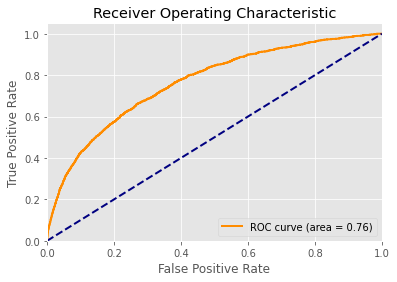

In [44]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
plt.style.use('ggplot')
y_test_conv = y_test.astype(int)
roc_auc = roc_auc_score(y_test_conv, y_pred_probs)

fpr, tpr, _ = roc_curve(y_test_conv, y_pred_probs)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

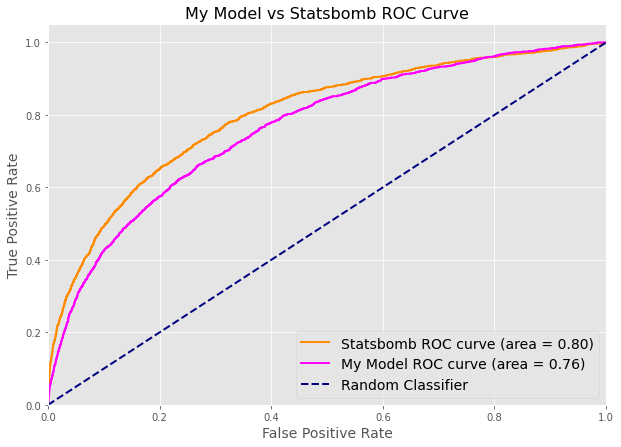

In [45]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
plt.style.use('ggplot')


roc_auc_sb = roc_auc_score(y_test_conv, sb_test)

fpr_sb, tpr_sb, _ = roc_curve(y_test_conv, sb_test)
plt.figure(figsize = (10,7))
plt.plot(fpr_sb, tpr_sb, color='darkorange', lw=2, label=f'Statsbomb ROC curve (area = {roc_auc_sb:.2f})')
plt.plot(fpr, tpr, color='#FF00FF', lw=2, label=f'My Model ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label = 'Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize = 14)
plt.ylabel('True Positive Rate', fontsize = 14)
plt.title('My Model vs Statsbomb ROC Curve', fontsize = 16)
plt.legend(loc='lower right', fontsize = 14)
#plt.savefig('first_attempt1.png', dpi = 1000, facecolor = 'white', bbox_inches = 'tight')
plt.show()

In [46]:
from sklearn.metrics import log_loss

logloss_model = log_loss(y_test_conv, y_pred_probs)
logloss_sb = log_loss(y_test_conv, sb_test)

print(f"Model Log Loss: {logloss_model}")
print(f"Statsbomb Log Loss: {logloss_sb}")

Model Log Loss: 0.2691666930081965
Statsbomb Log Loss: 0.25385731116418275


In [47]:
from sklearn.metrics import roc_auc_score, roc_curve
roc_auc = roc_auc_score(y_test_conv, y_pred_probs)
roc_auc_sb = roc_auc_score(y_test_conv, sb_test)
print(f"My model: {roc_auc}")
print(f"SB: {roc_auc_sb}")

My model: 0.7648590552776349
SB: 0.7993221281967366
